In [ ]:
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(EnsDb.Hsapiens.v86)
    library(GenomicRanges)
    library(future)
    library(ggplot2)

In [ ]:
counts <- Read10X_h5("/SGRNJ06/randd/PROJECT/scATAC/self_pipe/20240407_K562_3T3_824_sc_rr/A0326_4_3K_NOchendian_WXne_8242nd_D02SDS_T7_EDTA5030/outs/A0326_4_3K_NOchendian_WXne_8242nd_D02SDS_T7_EDTA5030_filtered_peak_count.h5")
metadata <- read.csv(
  file = "/SGRNJ06/randd/PROJECT/scATAC/self_pipe/20240407_K562_3T3_824_sc_rr/A0326_4_3K_NOchendian_WXne_8242nd_D02SDS_T7_EDTA5030/outs/cell_qc_metrics.tsv",
  header = TRUE,
  row.names = 1,
  sep='\t'
)

brain_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c(":", "-"),
  #genome = "mm10",
  min.cells = 0,
  min.features = 0,
  fragments = '/SGRNJ06/randd/PROJECT/scATAC/self_pipe/20240407_K562_3T3_824_sc_rr/A0326_4_3K_NOchendian_WXne_8242nd_D02SDS_T7_EDTA5030/outs/fragments_corrected_dedup_count.tsv.gz',
)

In [ ]:
brain <- CreateSeuratObject(
  counts = brain_assay,
  assay = 'peaks',
  project = 'ATAC',
  meta.data = metadata
)

In [21]:
granges(brain)

GRanges object with 171486 ranges and 0 metadata columns:
                    seqnames            ranges strand
                       <Rle>         <IRanges>  <Rle>
       [1] GRCh38_GL000008.2     113589-113773      *
       [2] GRCh38_GL000008.2     136870-137250      *
       [3] GRCh38_GL000008.2     170154-170309      *
       [4] GRCh38_GL000008.2       83126-83409      *
       [5] GRCh38_GL000009.2     124418-125148      *
       ...               ...               ...    ...
  [171482]         mm10_chrY 90744350-90744588      *
  [171483]         mm10_chrY 90804782-90805242      *
  [171484]         mm10_chrY 90808771-90808906      *
  [171485]         mm10_chrY 90825374-90825689      *
  [171486]         mm10_chrY 90828491-90829013      *
  -------
  seqinfo: 100 sequences from an unspecified genome; no seqlengths

In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = FALSE)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(brain) <- annotations

In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = FALSE)
annotations1 <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86, verbose = FALSE)

In [ ]:
# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('mm10_chr', seqlevels(annotations))
genome(annotations) <- "mm10"
seqlevels(annotations1) <- paste0('GRCh38_chr', seqlevels(annotations1))
genome(annotations1) <- "hg38"

In [ ]:
annotations

In [ ]:
annotations1

In [ ]:
l3 = GRangesList(annotations,annotations1)

In [ ]:
l3

In [ ]:
Reduce(merge, l3)

In [ ]:
annotations_merge = unlist(as(l3, "GRangesList"))

In [ ]:
annotations_merge

In [ ]:
# add the gene information to the object
Annotation(brain) <- annotations_merge

In [ ]:
brain <- NucleosomeSignal(object = brain)

In [ ]:
brain <- TSSEnrichment(brain, fast = FALSE)

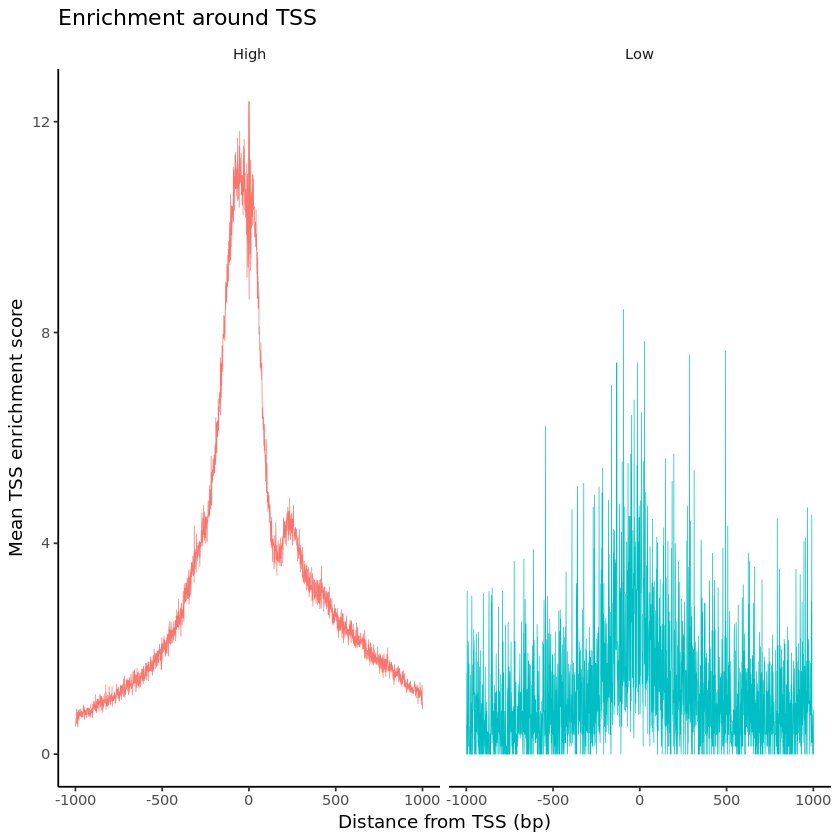

In [22]:
brain$high.tss <- ifelse(brain$TSS.enrichment > 2, 'High', 'Low')
TSSPlot(brain, group.by = 'high.tss') + NoLegend() + ggtitle("Enrichment around TSS")

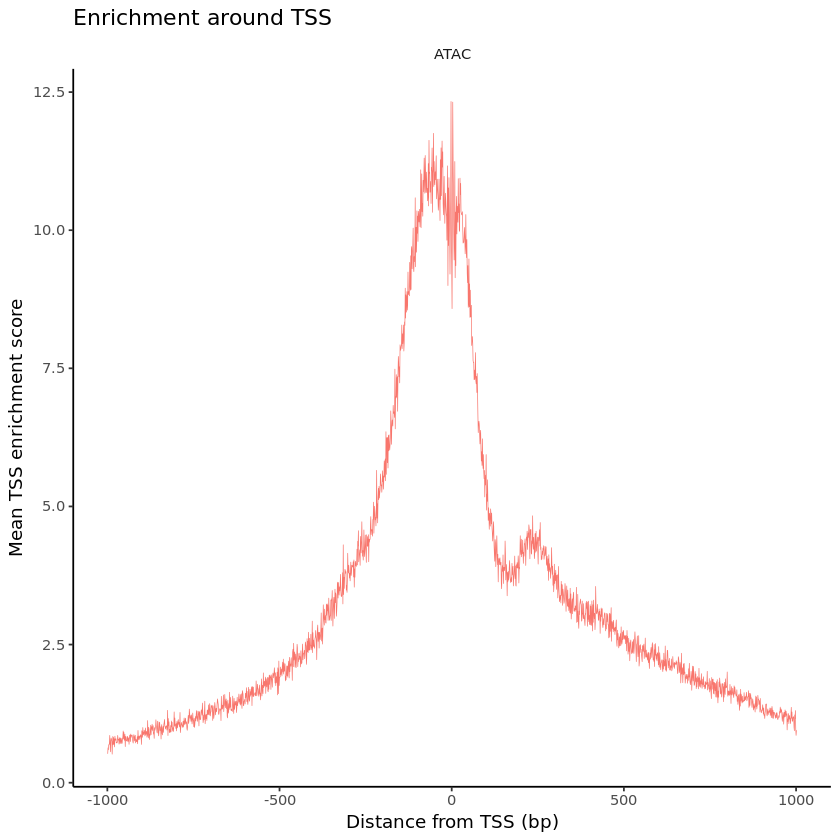

In [23]:
TSSPlot(brain) + NoLegend() + ggtitle("Enrichment around TSS")

In [ ]:
df = as.data.frame(brain@assays$peaks@positionEnrichment)

In [ ]:
max(colMeans(df))

In [ ]:
?TSSEnrichment

In [ ]:
?TSSPlot

In [ ]:
df